# Justice Nii-Ayitey

### Stat 517 Project #1

### Question 2: Predicting Income >$50k or not

### Import Libraries

In [21]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd
#data visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

### Load Data

In [22]:
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv");adult.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Statistical Analysis of Numerical Features

In [23]:
#we have age between 17 and 90
#fnlwgt is a weighted identifier of demographic
#almost everyone is working 40 to 45 hours per week
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Visual Inspection of Data

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


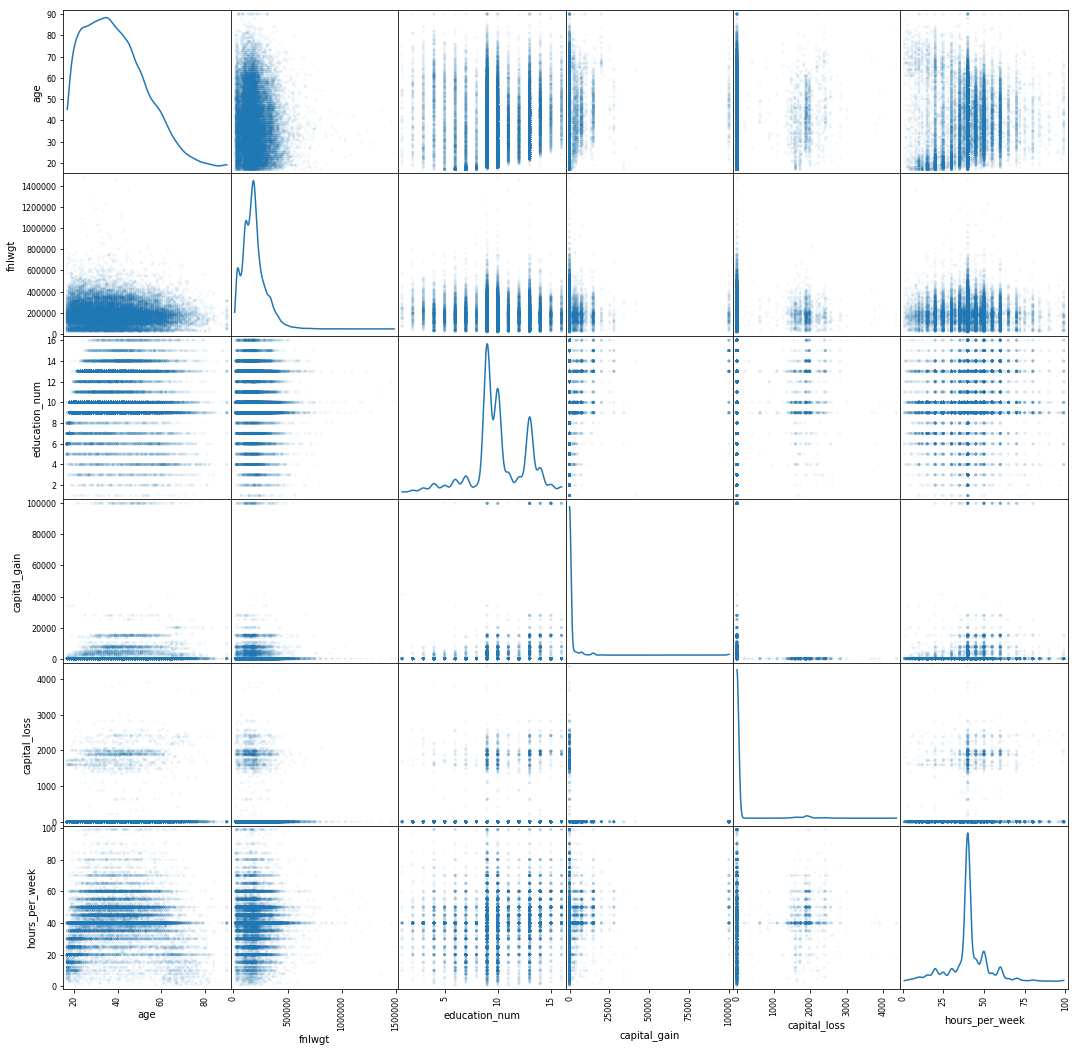

In [24]:
#so we can very clearly tell that everyone works 40 hours per week
#we can tell that almost everyone studied 9 years then it drops to 10
#the range of age falls within 45

from pandas.tools.plotting import scatter_matrix
scatter_matrix(adult, alpha=0.05, figsize=(18, 18), diagonal='kde')
pass

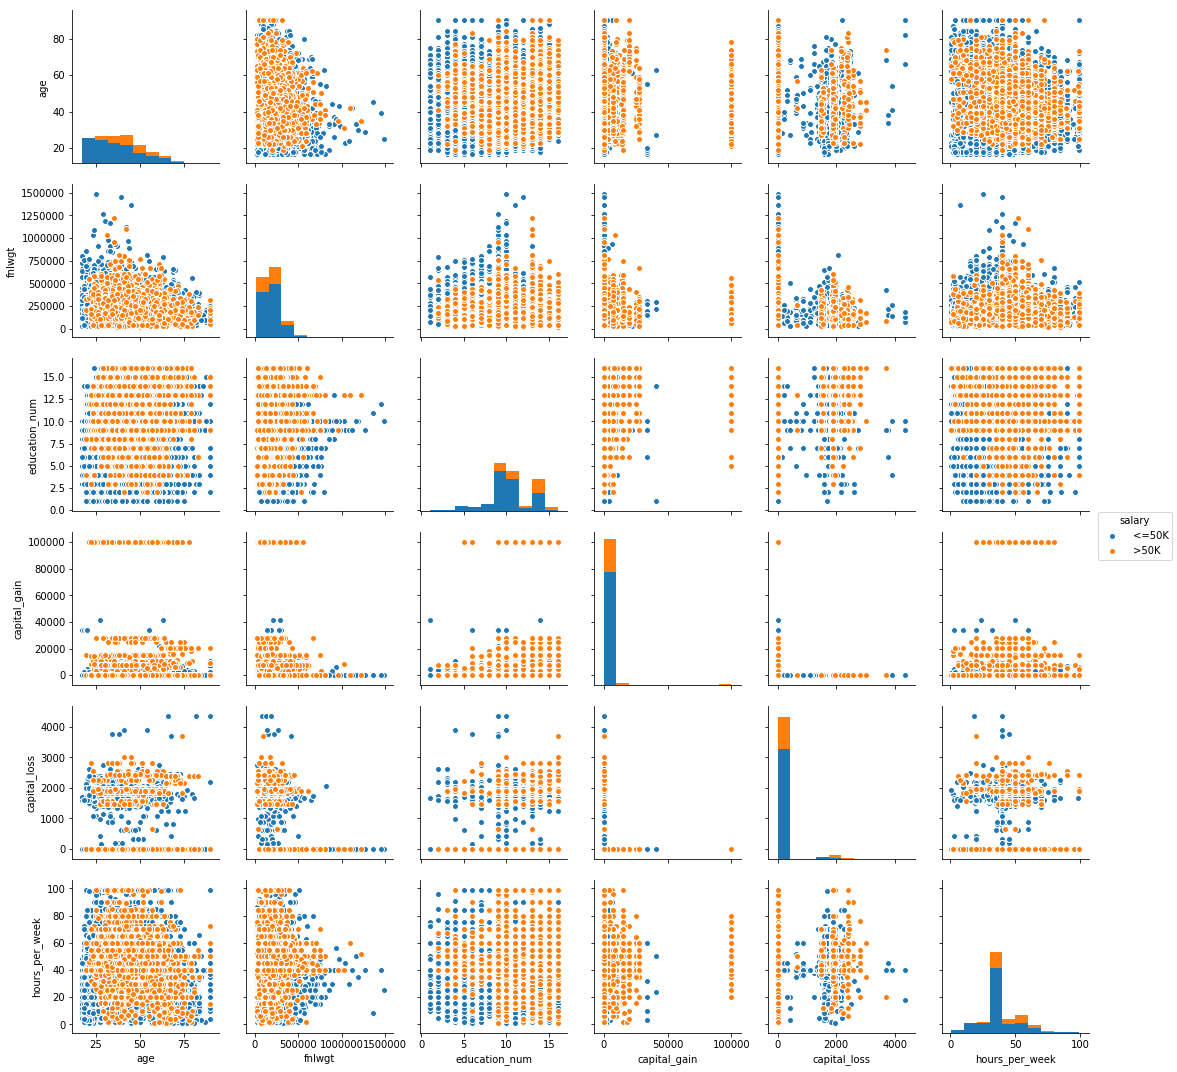

In [25]:
sns.pairplot(adult, hue='salary')

### Preprocessing the Dataset

In [26]:
import pandas as pd
import os
os.chdir('C:\\Users\\User\\Desktop\\STAT517')

In [27]:
stev_adultfn = ("dummy.txt")
stev_adult= pd.read_csv(stev_adultfn)
stev_adult.head(3)

,age,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Self-emp-inc,workclass=Self-emp-not-inc,workclass=State-gov,workclass=Without-pay,fnlwgt,education=10th,...,native_country=Portugal,native_country=Puerto-Rico,native_country=Scotland,native_country=South,native_country=Taiwan,native_country=Thailand,native_country=Trinadad&Tobago,native_country=Vietnam,native_country=Yugoslavia,salary
0,39,0,0,0,0,0,1,0,77516,0,...,0,0,0,0,0,0,0,0,0,<=50K
1,50,0,0,0,0,1,0,0,83311,0,...,0,0,0,0,0,0,0,0,0,<=50K
2,38,0,0,0,0,0,0,0,215646,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [28]:
stev_adult["salary"]=stev_adult["salary"].astype("category")
stev_adult["salary_cat"]=stev_adult["salary"].cat.codes
stev_adult.dtypes.head(3)

age                      int64
workclass=Federal-gov    int64
workclass=Local-gov      int64
dtype: object

In [29]:
stev_adult=stev_adult.select_dtypes(include=['uint8','int64','int8']).copy()
stev_adult.head(3)

,age,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Self-emp-inc,workclass=Self-emp-not-inc,workclass=State-gov,workclass=Without-pay,fnlwgt,education=10th,...,native_country=Portugal,native_country=Puerto-Rico,native_country=Scotland,native_country=South,native_country=Taiwan,native_country=Thailand,native_country=Trinadad&Tobago,native_country=Vietnam,native_country=Yugoslavia,salary_cat
0,39,0,0,0,0,0,1,0,77516,0,...,0,0,0,0,0,0,0,0,0,0
1,50,0,0,0,0,1,0,0,83311,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0,0,0,0,0,0,0,215646,0,...,0,0,0,0,0,0,0,0,0,0


### Train and Test Datasets

In [30]:
#salary_cat as the response variables
y_adult=stev_adult['salary_cat']
y_adult.shape

(32561,)

In [31]:
#all variables except salary_cat
X_adult=stev_adult.drop('salary_cat',axis=1)
X_adult.shape

(32561, 97)

In [32]:
#dividing dataset into 25% being testing and 75% being training
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adult, y_adult,
                                                random_state=1, test_size=0.25)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (24420, 97)
X_test shape: (8141, 97)
y_train shape: (24420,)
y_test shape: (8141,)


### k-Nearest Neighbor

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [34]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [35]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [0 0 1 ... 0 0 0]


In [36]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.77


In [37]:
#roc curve
y_model = clf.predict(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_model)

0.6391580464041425

### Analyzing KNeighborsClassifier

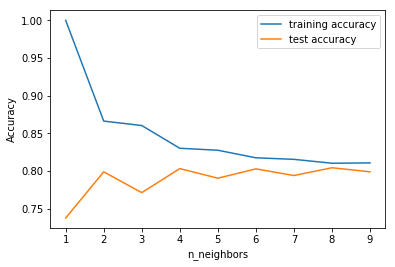

In [38]:
#with a range from 1 to 10, the test accuracy is high when n_neighbors is at 8
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Naive Bayes 

In [39]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.8028497727551898

In [41]:
#roc curve 
roc_auc_score(y_test,y_model)

0.6250505182861089

### Logistic Regression

In [42]:
#given c=1, c=100, and c=0.01, the test score and roc curse for the logistic regression are approximately the same
logreg = LogisticRegression().fit(X_train, y_train)
y_model = logreg.predict(X_test)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.793
Test set score: 0.806


In [43]:
#roc curve
roc_auc_score(y_test,y_model)

0.6116623740150338

In [44]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
y_model = logreg100.predict(X_test)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.793
Test set score: 0.806


In [45]:
#roc curve
roc_auc_score(y_test,y_model)

0.6116623740150338

In [46]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
y_model = logreg001.predict(X_test)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.793
Test set score: 0.806


In [47]:
#roc curve
roc_auc_score(y_test,y_model)

0.6116623740150338

### Decision Trees

In [48]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_model = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.817


In [49]:
#roc curve
roc_auc_score(y_test,y_model)

0.747439903308734

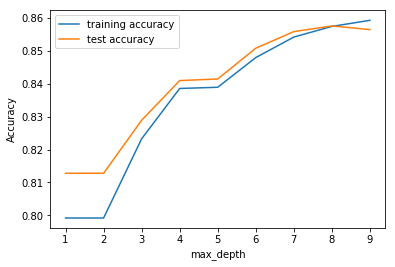

In [50]:
#for a given range from 1 to 10, the test accuracy of the Decision Tree is high when max_depth is at 8
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 10
max_depth_settings = range(1, 10)

for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_model = forest.predict(X_test)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.861


In [52]:
#roc curve
roc_auc_score(y_test,y_model)

0.778922398560749

### SVC

In [53]:
#the output of SVC takes sometime

#from sklearn.svm import SVC
#svc = SVC()
#svc.fit(X_train, y_train)
#y_model = logreg001.predict(X_test)
#print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
#print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [54]:
#roc curve
#y_model = model.predict(X_test)
#roc_auc_score(y_test,y_model)

### Neural Networks

In [55]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_model = mlp.predict(X_test)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.79
Accuracy on test set: 0.81


In [56]:
#roc curve
roc_auc_score(y_test,y_model)

0.5844453398618238

### Summary

In [57]:
decision=pd.DataFrame({'Model':['k-Nearest Neighbor','Naive Bayes','logreg','logreg100','logreg0.01','Decision Tree','Random Forest',
                              'Neural Networks'],'Test':[.77,.80,.81,.81,.81,.82,.86,.81],'ROC':[.64,.63,.61,.61,.61,.75,.78,.58]})
decision


,Model,ROC,Test
0,k-Nearest Neighbor,0.64,0.77
1,Naive Bayes,0.63,0.80
2,logreg,0.61,0.81
3,logreg100,0.61,0.81
4,logreg0.01,0.61,0.81
5,Decision Tree,0.75,0.82
6,Random Forest,0.78,0.86
7,Neural Networks,0.58,0.81


In [58]:
# From the table above, random forest had the higest test accuracy (0.86)
# Besides, it also had the highest Roc_curve (0.78)
# Hence, random forest could be used as a model to determine if 
#an individual has a salary greater than or less than $50,000 annually based on the variables provided